<a href="https://colab.research.google.com/github/mohammad2682/Covid-19/blob/master/CNN_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Adding Packages and Libraries**

In [0]:
import numpy as np 
import pandas as pd
import cv2
import os
from matplotlib import pyplot as plt

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import BatchNormalization, Dropout

Using TensorFlow backend.


# **Cloning dataset from GitHub Repository**

In [3]:
!git clone https://github.com/mohammad2682/Covid19-Dataset

Cloning into 'Covid19-Dataset'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 2523 (delta 6), reused 0 (delta 0), pack-reused 2502
Receiving objects: 100% (2523/2523), 229.95 MiB | 29.75 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Checking out files: 100% (4965/4965), done.


# Importing dataset

In [0]:
#importing train data from repo
import glob as glob
import skimage.transform as st
dl=['COVID','non-COVID']
dl=os.listdir('Covid19-Dataset/Covid-19-Dataset/train/')
xtrain=[]
p=0
for i in range(2):
  for fn in sorted(glob.glob('Covid19-Dataset/Covid-19-Dataset/train/'+dl[i]+'/*.png')):
    img = cv2.imread(fn)
    img=st.resize(img,(128,128))
    xtrain.append(img)

In [0]:
#importing test data from repo
dl=['COVID','non-COVID']
dl=os.listdir('Covid19-Dataset/Covid-19-Dataset/test/')
xtest=[]
p=0
for i in range(2):
  for fn in sorted(glob.glob('Covid19-Dataset/Covid-19-Dataset/test/'+dl[i]+'/*.png')):
    img = cv2.imread(fn)
    img=st.resize(img,(128,128))
    xtest.append(img)

In [0]:
#creating labels for train data
ytrain=[]
for i in range(2):
  for j in range(1000):
    ytrain.append(i)
#creating labels for test data    
ytest=[]
for j in range(252):
  ytest.append(0)
for j in range(230):
  ytest.append(1)

In [0]:
xtrain1=np.array(xtrain)
xtest1=np.array(xtest)
ytrain1=np.array(ytrain)
ytest1=np.array(ytest)

In [0]:
ytest1 = ytest1.reshape((ytest1.shape[0],1))
ytrain1 = ytrain1.reshape((ytrain1.shape[0],1))

# **Data PreProcessing**

In [0]:
image_size = 128
num_channels = 3
num_features = image_size * image_size * num_channels
num_classes = 2

num_train = 2000

In [0]:
# Convert 4D arrays to 2D arrays
xtrain1 = xtrain1.reshape([-1, num_features])
xtest1  =  xtest1.reshape([-1, num_features])

print('Train data shape: {}'.format(xtrain1.shape))
print('Test  data shape: {}'.format(xtest1.shape))

Train data shape: (2000, 49152)
Test  data shape: (482, 49152)


In [0]:
# convert pixel range from [0, 255] to [0., 1.]
X_train = xtrain1.astype('float16')
x_test  = xtest1.astype('float16')

mu = np.mean(X_train, axis=0)

X_train -= mu
X_train /= 255.0

x_test -= mu
x_test /= 255.0

## ONE-hot encoding

In [19]:
y_train = keras.utils.to_categorical(ytrain1, num_classes)
y_test  = keras.utils.to_categorical(ytest1,  num_classes)

print(y_train.shape)
print(y_test.shape)

(2000, 2)
(482, 2)


## **Converting dataset to 4D arrays**

In [0]:
X_train = X_train.reshape((-1, image_size, image_size, num_channels))
x_test  =  x_test.reshape((-1, image_size, image_size, num_channels))

# **Creating a CNN with 2 Convolution Layers**

In [74]:
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(64, (7, 7), padding='same', input_shape = (128, 128, 3), activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.25))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
#classifier.add(Conv2D(16, (1, 1), activation = 'relu'))
classifier.add(Conv2D(128, (7, 7), padding='same', activation = 'relu'))
classifier.add(Dropout(0.25))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a third convolutional layer
#classifier.add(Conv2D(16, (1, 1), activation = 'relu'))
classifier.add(Conv2D(256, (7, 7), padding='same', activation = 'relu'))
classifier.add(Dropout(0.25))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dropout(0.25))
classifier.add(Dense(units = num_classes, activation = 'sigmoid'))
# Compiling the CNN
optimizer = keras.optimizers.Adam(lr=0.001)
classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 128, 128, 64)      9472      
_________________________________________________________________
batch_normalization_6 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
dropout_25 (Dropout)         (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 64, 64, 128)       401536    
_________________________________________________________________
dropout_26 (Dropout)         (None, 64, 64, 128)       0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 32, 32, 128)      

In [26]:
bs = 32
ep = 1
classifier.fit(x= xtrain1, y= y_train, batch_size= bs, epochs= ep, validation_data=(xtest1, y_test))

Train on 2000 samples, validate on 482 samples
Epoch 1/1
2000/2000 [==============================] - 23s 11ms/step - loss: 0.5383 - accuracy: 0.7520 - val_loss: 0.8744 - val_accuracy: 0.3008


# **Data Augmentation**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=False, 
    samplewise_center=False, 
    featurewise_std_normalization=False, 
    samplewise_std_normalization=False, 
    zca_whitening=False, 
    rotation_range=0, 
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    horizontal_flip=True, 
    vertical_flip=False)

datagen.fit(xtrain1)
datagen = ImageDataGenerator(rescale=1./255)
datagen.fit(xtest1)

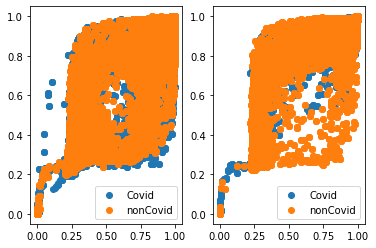

In [72]:
plt.subplot(1,2,1)
plt.scatter(xtrain1[0:999,0],xtrain1[0:999,1],label='Covid')
plt.scatter(xtrain1[1000:1999,0],xtrain1[1000:1999,1],label='nonCovid')
plt.legend()
#"""
plt.subplot(1,2,2)
plt.scatter(xtest1[0:251,0],xtest1[0:251,1], label='Covid')
plt.scatter(xtest1[252:481,0],xtest1[252:481,1], label='nonCovid')
plt.legend()
#"""
plt.show()

In [76]:
bs = 16
ep = 5
history = classifier.fit_generator(datagen.flow(xtrain1, y_train, batch_size=bs),
                        steps_per_epoch=num_train//bs,
                        epochs=ep,
                        validation_data=(xtest1, y_test))

Epoch 1/5
125/125 [==============================] - 29s 232ms/step - loss: 0.6172 - accuracy: 0.6367 - val_loss: 18.0862 - val_accuracy: 0.4772
Epoch 2/5
125/125 [==============================] - 28s 226ms/step - loss: 0.5314 - accuracy: 0.7402 - val_loss: 11.0352 - val_accuracy: 0.4772
Epoch 3/5
125/125 [==============================] - 28s 226ms/step - loss: 0.4936 - accuracy: 0.7563 - val_loss: 10.3436 - val_accuracy: 0.4772
Epoch 4/5
125/125 [==============================] - 28s 227ms/step - loss: 0.4201 - accuracy: 0.8083 - val_loss: 63.5234 - val_accuracy: 0.4772
Epoch 5/5
125/125 [==============================] - 28s 227ms/step - loss: 0.3878 - accuracy: 0.8263 - val_loss: 18.5840 - val_accuracy: 0.4730


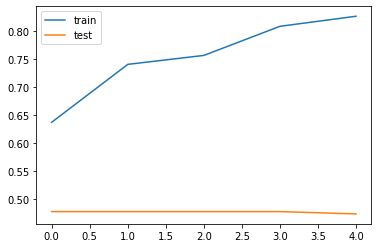

In [77]:
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.show()

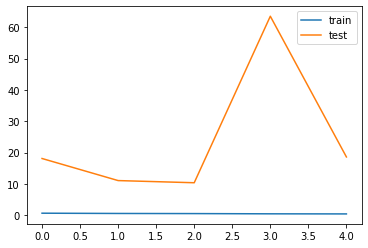

In [78]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

## Trying another CNN 

In [0]:
model = Sequential()

# Conv Block 1
model.add(Conv2D(64, (3, 3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Conv Block 2
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Conv Block 3
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Classifier
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 126, 126, 64)      36928     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 63, 63, 64)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 63, 63, 128)       73856     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 61, 61, 128)       147584    
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 30, 30, 128)     

In [0]:
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=bs),
                    steps_per_epoch=num_train//bs,
                    epochs=1,
                    validation_data=(x_test, y_test))

Epoch 1/1
101/125 [=======================>......] - ETA: 1:47 - loss: 0.6939 - accuracy: 0.4907

KeyboardInterrupt: ignored